# GRIP - The Spark Foundation

## Name : Khant Yash 

## Task3 : Prediction using Unsupervised ML


In this section We are going to use KMeans Clustering as Clustering Algorithm.

In [1]:
#Importing Supporting Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading the data
iris = pd.read_csv("iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
#Saperate Features we want to use in classification
X = iris.iloc[:,1:5].values

In [4]:
#Applying ELBOW METHOD to choose number of Cluster
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300,n_init = 10,random_state=41)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

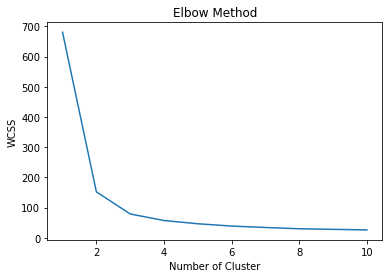

In [5]:
#Plot WCSS to observ elbow
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel("Number of Cluster")
plt.ylabel("WCSS")
plt.show()

We can see that after 3 graph is slowly going to downward... So as per Elbow method 3 is best number of cluster to choose.

In [6]:
#After finding suitable number of clustering Fit data to CLuster
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans = kmeans.fit_predict(X)

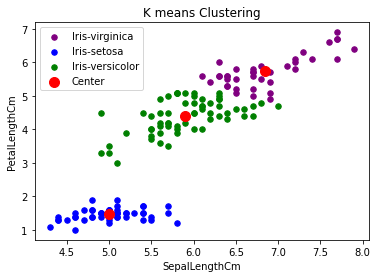

In [7]:
#Ploting data after Clusting
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,2],s = 30, c= 'purple', label='Iris-virginica' )
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,2],s = 30, c= 'blue', label='Iris-setosa' )
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,2],s = 30, c= 'green', label='Iris-versicolor' )
plt.scatter(kmeans.cluster_centers_[:,0],  kmeans.cluster_centers_[:,2], s=100, c='red' , label='Center')
plt.title('K means Clustering')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()